import modules


C:\Users\etyrr\AppData\Local\Temp\ipykernel_2144\4020378634.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


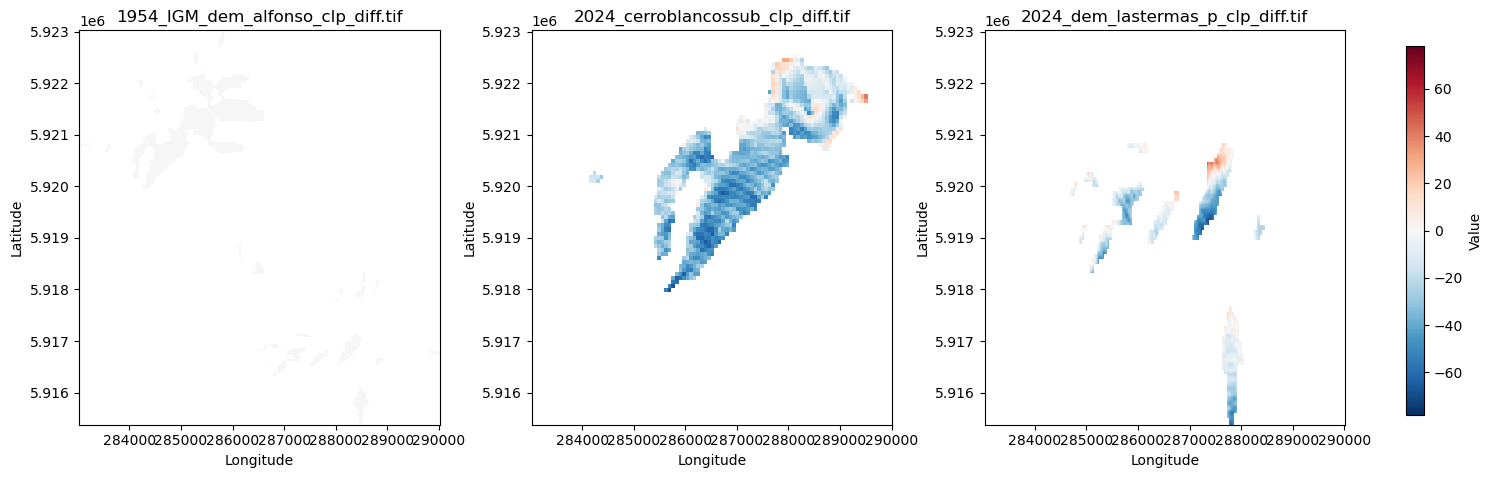

In [16]:
import rasterio
import matplotlib.pyplot as plt
import os
import numpy as np
print("import modules")

# paths 
outputFolder = "C:/Users/etyrr/OneDrive/Documents/CU_Grad/MillieWorkflow/data/DEM_forDiff_final_bothPolygons/output_data_minusIGM_2000/"

# Filter for the three rasters
raster_files = [f for f in os.listdir(outputFolder) if f.endswith('diff.tif')]
raster_files = sorted(raster_files)[:3]  # use only first 3 if more exist

# Initialize lists to track global vmin, vmax and bounds
all_data = []
all_extents = []

# First pass: collect data and stats
for map in raster_files:
    with rasterio.open(os.path.join(outputFolder, map)) as src:
        data = src.read(1)
        nodata = src.nodata
        if nodata is not None:
            data = np.where(data == nodata, np.nan, data)
        all_data.append(data)
        all_extents.append([
            src.bounds.left,
            src.bounds.right,
            src.bounds.bottom,
            src.bounds.top
        ])

# Determine common vmin, vmax and extent
vmin = np.nanmin([np.nanmin(data) for data in all_data])
vmax = np.nanmax([np.nanmax(data) for data in all_data])
common_extent = [
    min(e[0] for e in all_extents),
    max(e[1] for e in all_extents),
    min(e[2] for e in all_extents),
    max(e[3] for e in all_extents)
]

# Plotting
fig, axes = plt.subplots(1, len(raster_files), figsize=(18, 6))
for ax, map, data in zip(axes, raster_files, all_data):
    div_cmap = plt.get_cmap('RdBu_r')  # or 'seismic' for stronger contrast

    # Ensure symmetric color scale around 0
    abs_max = max(abs(vmin), abs(vmax))
    im = ax.imshow(data, cmap=div_cmap, extent=common_extent, vmin=-abs_max, vmax=abs_max)
    ax.set_title(map)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

cbar = fig.colorbar(im, ax=axes, location='right', shrink=0.8, pad=0.02)
cbar.set_label('Value')

# Layout tweaks
plt.tight_layout()
plt.subplots_adjust(right=0.75)  # leave room for colorbar
plt.savefig(outputFolder + f"Updated_graphic.png")
plt.show()